# Explore here

Paso 1: Carga del conjunto de datos

In [18]:
import pandas as pd

housing_url='https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
db=pd.read_csv(housing_url)

db.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
df=db[['Latitude','Longitude','MedInc']]
df.head(1)

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252


Paso 2: Construye un K-Means

In [20]:
from sklearn.model_selection import train_test_split

X = df


X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)



KMeans(n_clusters=6, random_state=42)

In [22]:
y_train=list(model.labels_)

In [23]:
X_train['clusters']=y_train
X_train.columns

Index(['Latitude', 'Longitude', 'MedInc', 'clusters'], dtype='object')

In [24]:
X_train.head()

,Latitude,Longitude,MedInc,clusters
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


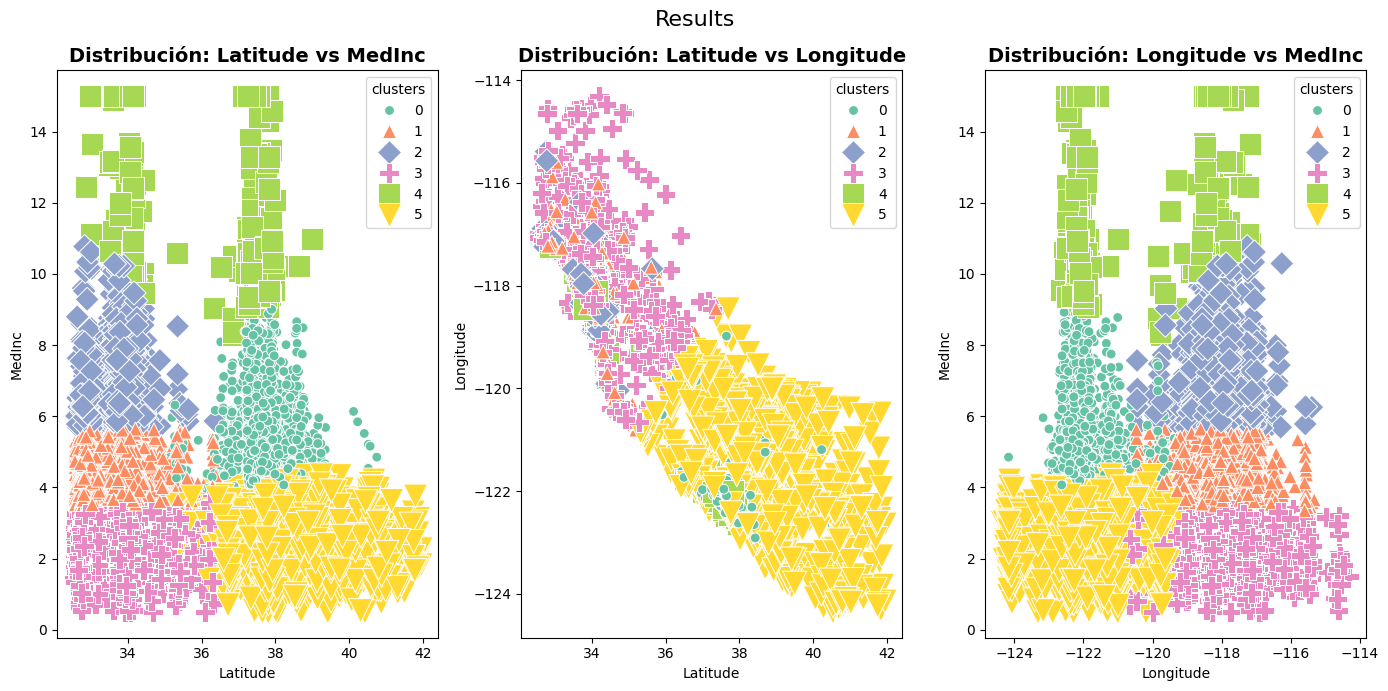

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axis = plt.subplots(1, 3, figsize = (14, 7))
fig.suptitle("Results", fontsize=16)

markers = {0: "o", 1: "^", 2: "D", 3: "P", 4: "s", 5: "v"}
sizes = {0: 50, 1: 100, 2: 150, 3: 200, 4: 250, 5: 300}

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "MedInc", hue = "clusters", palette = "Set2", 
                style = "clusters", markers=markers, size="clusters", sizes=sizes, legend="full", edgecolor="white", linewidth=0.7)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "Longitude", hue = "clusters", palette = "Set2", 
                style = "clusters", markers=markers, size="clusters", sizes=sizes, legend="full", edgecolor="white", linewidth=0.7)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "clusters", palette = "Set2", 
                style = "clusters", markers=markers, size="clusters", sizes=sizes, legend="full", edgecolor="white", linewidth=0.7)

axis[0].set_title("Distribución: Latitude vs MedInc", fontsize=14, fontweight='bold')
axis[1].set_title("Distribución: Latitude vs Longitude", fontsize=14, fontweight='bold')
axis[2].set_title("Distribución: Longitude vs MedInc", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [26]:
model.cluster_centers_

array([[  37.68747253, -121.91549044,    5.37914949],
       [  33.88940929, -118.00301129,    4.34929638],
       [  33.84943618, -118.04112764,    6.94251551],
       [  34.04157015, -118.02425727,    2.42859805],
       [  35.87817073, -120.28422764,   11.74873415],
       [  38.14364263, -121.62299724,    2.73992841]])

Paso 3: Predice con el conjunto de test

In [27]:
y_test = list(model.predict(X_test))
X_test["clusters"] = y_test
X_test.head(5)

,Latitude,Longitude,MedInc,clusters
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


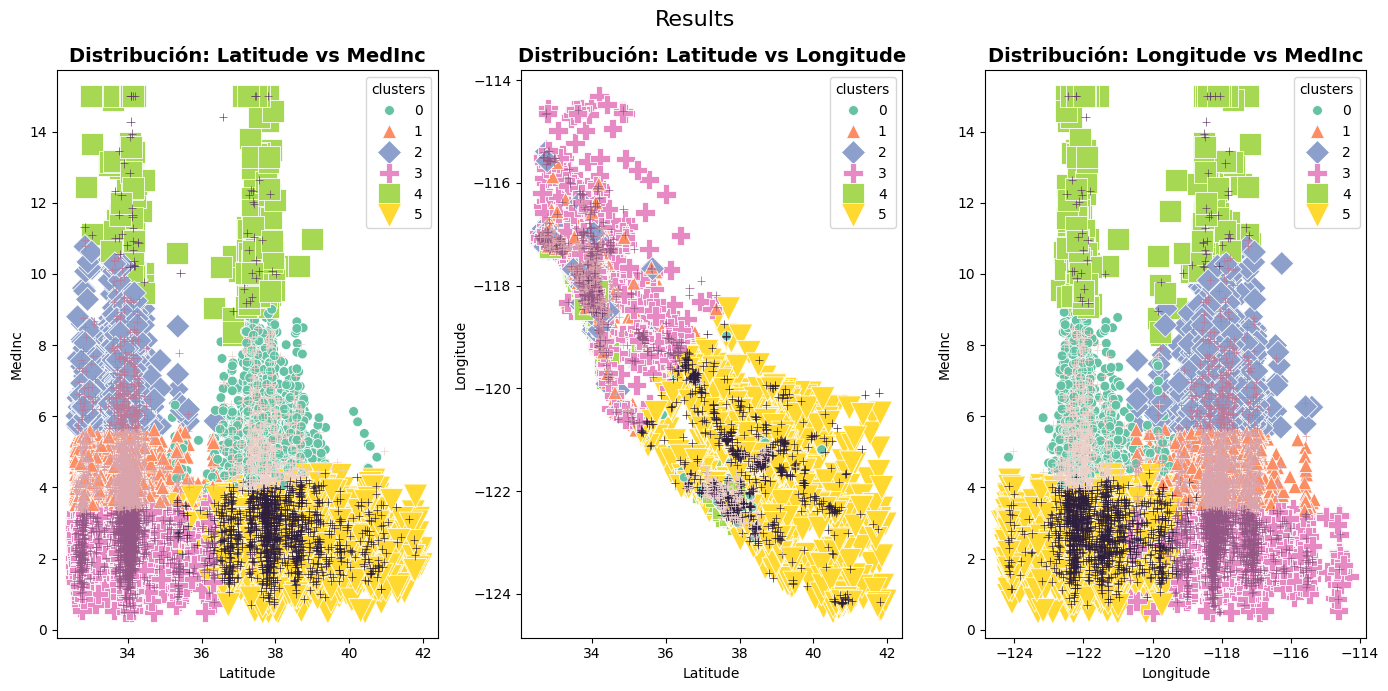

In [28]:
fig, axis = plt.subplots(1, 3, figsize = (14, 7))
fig.suptitle("Results", fontsize=16)

markers = {0: "o", 1: "^", 2: "D", 3: "P", 4: "s", 5: "v"}
sizes = {0: 50, 1: 100, 2: 150, 3: 200, 4: 250, 5: 300}

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "MedInc", hue = "clusters", palette = "Set2",
                style = "clusters", markers=markers, size="clusters", sizes=sizes, legend="full")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "Longitude", hue = "clusters", palette = "Set2",
                style = "clusters", markers=markers, size="clusters", sizes=sizes, legend="full")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "clusters", palette = "Set2",
                style = "clusters", markers=markers, size="clusters", sizes=sizes, legend="full")

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "MedInc", hue = "clusters", color = "black",
                marker = "+", legend=False)
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "Longitude", hue = "clusters", color = "black",
                marker = "+", legend=False)
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "clusters", color = "black",
                marker = "+", legend=False)

axis[0].set_title("Distribución: Latitude vs MedInc", fontsize=14, fontweight='bold')
axis[1].set_title("Distribución: Latitude vs Longitude", fontsize=14, fontweight='bold')
axis[2].set_title("Distribución: Longitude vs MedInc", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [29]:
from pickle import dump

dump(model, open("../models/k-means_default_42.sav", "wb"))

Paso 4: Entrena un modelo de clasificación supervisada

Por la naturaleza de los datos escogemos el modelo "Decision Tree"

In [30]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state = 42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

tree = export_text(model_DT, feature_names = list(X_train.columns))
print(tree)

|--- clusters <= 4.50
|   |--- MedInc <= 3.39
|   |   |--- clusters <= 2.00
|   |   |   |--- class: 1
|   |   |--- clusters >  2.00
|   |   |   |--- class: 3
|   |--- MedInc >  3.39
|   |   |--- clusters <= 0.50
|   |   |   |--- class: 0
|   |   |--- clusters >  0.50
|   |   |   |--- clusters <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- clusters >  1.50
|   |   |   |   |--- clusters <= 2.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- clusters >  2.50
|   |   |   |   |   |--- MedInc <= 5.92
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- MedInc >  5.92
|   |   |   |   |   |   |--- class: 4
|--- clusters >  4.50
|   |--- class: 5



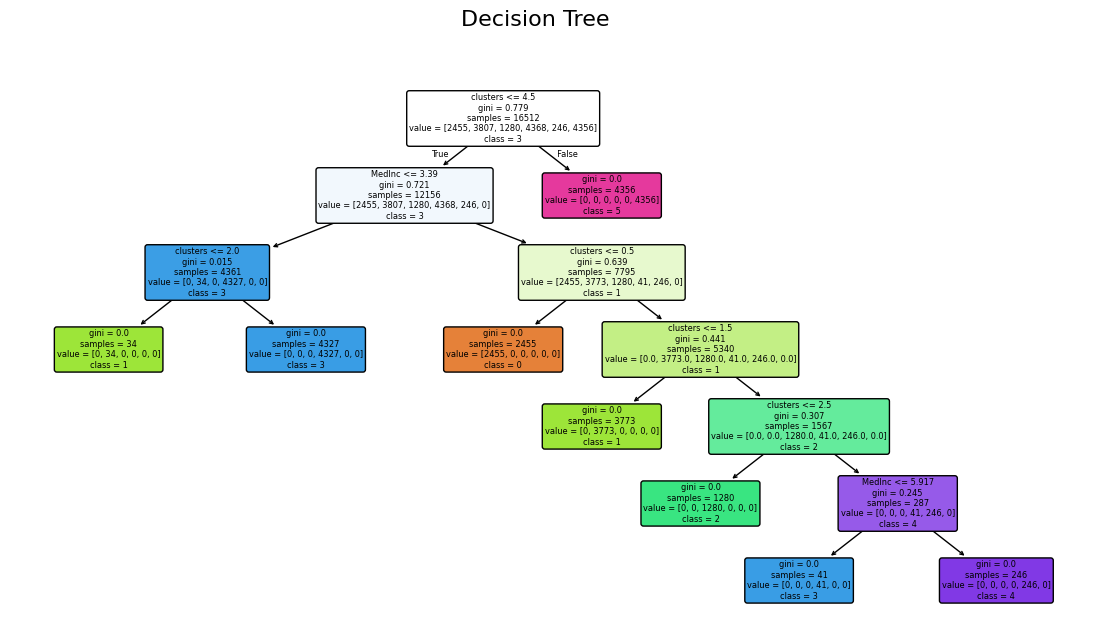

In [36]:
fig = plt.figure(figsize=(14, 7))
fig.suptitle("Decision Tree", fontsize=16)

plot_tree(
    model_DT, 
    feature_names = list(X_train.columns), 
    class_names = ["0", "1", "2", "3", "4", "5"], 
    filled = True, 
    rounded = True)

plt.show()

In [37]:
y_pred = model_DT.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [39]:
dump(model_DT, open("../models/decision_tree_classifier_default_42.sav", "wb"))